# Models

## Linear Models

In [1]:
import tprstats
import pandas as pd
import numpy as np
coffee_data = pd.read_excel('../data/Coffee_Data.xlsx', engine='openpyxl')
diamonds_211 = pd.read_excel('../data/Diamonds_211.xlsx', engine='openpyxl')

### Create a Model
To create a model, use the `tprstats.model()` function providing the name, formula, and data used in the model. The `tprstats.model()` function will automatically run a regression to fit the data.

Models:
- Cross-sectional linear models `name = "cs"`.
- Time series linear models `name = "ts"`.
- Logit Binary Choice models `name = "logit"`.
- Probit Binary Choice models `name = "probit"`.

In [2]:
model_diamond = tprstats.model(name = "cs", formula='Price ~ Carat + C(Clarity)', data=diamonds_211)

### Summary Statistics

In [3]:
model_diamond.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
No. Observations:                 211   F-statistic:                     765.0
Covariance Type:                  HC1   Prob (F-statistic):          6.99e-137
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -1.241e+04    699.105    -17.754      0.000   -1.38e+04    -1.1e+04
C(Clarity)[T.3]  4254.2767    454.654      9.357      0.000    3357.853    5150.701
C(Clarity)[T.4]  5942.2429    475.430     12.499      0.000    5004.856    6879.630
C(Clarity)[T.5]  7089.8345    535.164     13.248      0.000    6034.672    8144.997
C(Clarity)[T.6]  7688.9068    806.822      9.530      0.000    6098.128    9279.686
C(Clarity)[T.8]  9160.7157    616.563     14.858      0.000    7945.063    1.04e+04
Carat            1.235e+04    271.137     45.557      0.000    1.18e+04    1.29e+04
===================================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

### Prediction
#### Model and New Data

In [4]:
model_coffee_ts = tprstats.model(name = "ts", formula='cons~rpcarb+rpcinc+rpcofe', data=coffee_data)
# model_coffee_ts_logs = tprstats.model(name = "ts", formula='log(cons)~log(rpcarb)+log(rpcinc)+log(rpcofe)', data=coffee_data)

In [ ]:
# new data for prediction
Xnew_coffee =pd.DataFrame({
    "rpcarb": [93, 76, 151],
    "rpcinc": [24, 27, 16],
    "rpcofe": [100, 95, 74]
})

#### Prediction Intervals

In [6]:
model_coffee_ts.prediction_intervals(Xnew_coffee)

,Predicted,Lower,Upper
0,10.143979,9.007576,11.280383
1,9.045275,7.891083,10.199467
2,14.710292,13.556601,15.863982


### Scaled Ceofficients
Scaled coefficient including standardized coefficients and elasticities can be accessed via the `scaled_coefficients` function.

In [7]:
model_coffee_ts.scaled_coefficients()

,coefs,std_coefs,elasticities
rpcarb,0.090120,1.356548,0.8475
rpcinc,0.123477,0.412841,0.2540
rpcofe,-0.012582,-0.116004,-0.1065


#### Elasticities
To access just the elasticities, use the `elasticities` function.

In [8]:
model_coffee_ts.elasticities()

rpcarb    0.8475
rpcinc    0.2540
rpcofe   -0.1065
dtype: float64

#### Standardized Coefficients
To access just the standardized coefficients, use the `standardized_coefficients` function.

In [9]:
model_coffee_ts.standardized_coefficients()

rpcarb    1.356548
rpcinc    0.412841
rpcofe   -0.116004
dtype: float64

### Plots
#### Plot Actual vs. Fitted Values

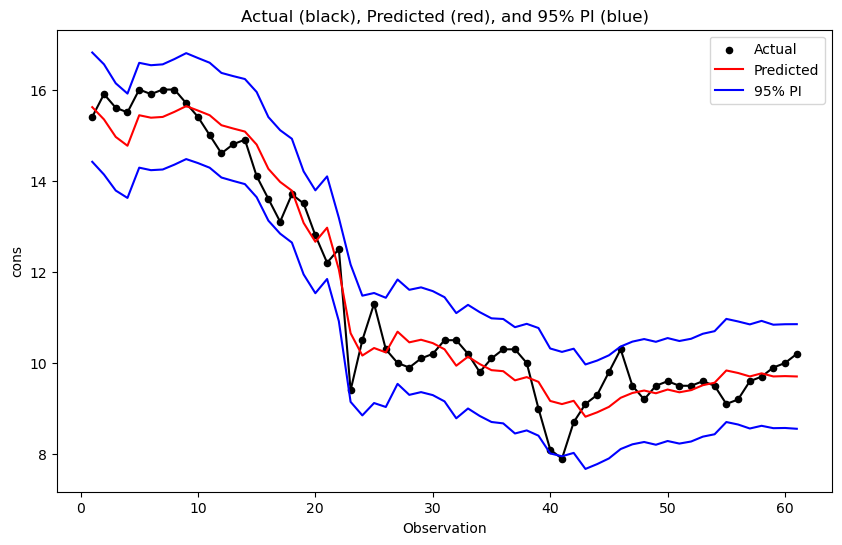

In [25]:
model_coffee_ts.plot_actual_fitted()

## Binary Choice Models

In [10]:
# setup
import pandas as pd
import tprstats
solar = pd.read_excel('../data/Solar_Data.xlsx').dropna()
solar_new = pd.read_excel('../data/Solar_New_Prospects.xlsx')

### Tests

#### Wald Test

In [11]:
model_coffee_ts.wald_test('(rpcofe = -0.018), (rpcarb = 0.065)')

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Sale   No. Observations:                 1500
Model:                          Logit   Df Residuals:                     1494
Method:                           MLE   Df Model:                            5
Date:                Mon, 09 Dec 2024   Pseudo R-squ.:                  0.2847
Time:                        21:34:20   Log-Likelihood:                -154.39
converged:                       True   LL-Null:                       -215.84
Covariance Type:            nonrobust   LLR p-value:                 7.619e-25
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              -12.7445      4.837     -2.635      0.008     -22.224      -3.265
C(DrivesHybrid)[T.1]     0.9644      0.413      2.333      0.020       0.154       1.775
AnnualSave               3.9268      0.649      6.048      0.000       2.654       5.199
AnnualCost              -4.0989      1.475     -2.778      0.005      -6.990      -1.207
NearbySolar              1.9421      0.398      4.884      0.000       1.163       2.722
HomeValue                0.0178      0.008      2.192      0.028       0.002       0.034
========================================================================================
"""

In [12]:
#### Ramsey Test (RESET)

array([0.01617376, 0.00438152, 0.02321191, ..., 0.1497396 , 0.0078212 ,
       0.02681689])

## Binary Choice Models

In [ ]:
# setup
import pandas as pd
import tprstats
solar = pd.read_excel('../data/Solar_Data.xlsx').dropna()
solar_new = pd.read_excel('../data/Solar_New_Prospects.xlsx')

### Logit

In [ ]:
# use C(DrivesHybrid) to test Logit works with categorical variables
solar_logit=tprstats.model("logit",formula="Sale~AnnualSave+AnnualCost+C(DrivesHybrid)+NearbySolar+HomeValue",data=solar)
solar_logit.summary()

In [ ]:
solar_logit.predict()

In [ ]:
solar_logit.classification_table()

In [14]:
X_out_of_sample = pd.DataFrame({
    "AnnualSave": [2.5, 1.9, 2.3],
    "AnnualCost": [1.8, 1.5, 1.7],
    "DrivesHybrid": [1,0,0],
    "NearbySolar": [0, 1, 0],
    "HomeValue": [550, 675, 495]
})
print("We create three homes: ")
print(X_out_of_sample)
print("Predicted Probabilities of purchase for the three homes are: ")
print(solar_logit.predict(X_out_of_sample))

In [15]:
# marginal effects
solar_logit.marginal_effects()

<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:                   Sale
Method:                          dydx
At:                           overall
========================================================================================
                          dy/dx    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
C(DrivesHybrid)[T.1]     0.0249      0.011      2.312      0.021       0.004       0.046
AnnualSave               0.1013      0.018      5.535      0.000       0.065       0.137
AnnualCost              -0.1057      0.039     -2.721      0.007      -0.182      -0.030
NearbySolar              0.0501      0.011      4.611      0.000       0.029       0.071
HomeValue                0.0005      0.000      2.161      0.031    4.27e-05       0.001
========================================================================================
"""

In [16]:
solar_logit.predict(solar_new)

0      0.200212
1      0.030138
2      0.006383
3      0.015173
4      0.003679
         ...   
995    0.001549
996    0.284837
997    0.800973
998    0.692739
999    0.000486
Length: 1000, dtype: float64

In [17]:
solar_logit.predict_and_rank(solar_new)

,Customer,AnnualSave,ElecBill,AnnualCost,DrivesHybrid,NearbySolar,HomeValue,PredictionNew,ProspectRank
0,1,1.887929,1.823863,1.735912,0,1,511.553652,0.200212,661.0
1,2,1.742936,1.839178,1.706554,0,0,528.648069,0.030138,316.0
2,3,1.559239,1.208948,1.900877,0,0,525.362779,0.006383,117.0
3,4,1.673532,1.386376,1.824364,0,0,531.669636,0.015173,211.0
4,5,1.304396,1.661826,1.799923,0,0,527.229859,0.003679,71.0
...,...,...,...,...,...,...,...,...,...
995,996,1.255306,1.459505,1.969996,0,0,528.512382,0.001549,24.0
996,997,2.523308,2.628325,1.828736,0,0,527.932617,0.284837,724.0
997,998,3.137109,2.328434,1.845495,0,0,526.328841,0.800973,992.0
998,999,2.809793,2.741628,2.076419,1,0,564.925589,0.692739,947.0


### Probit

In [18]:
solar_probit=tprstats.model("probit",formula="Sale~AnnualSave+AnnualCost+C(DrivesHybrid)+NearbySolar+HomeValue",data=solar)

In [19]:
solar_probit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:                   Sale   No. Observations:                 1500
Model:                         Probit   Df Residuals:                     1494
Method:                           MLE   Df Model:                            5
Date:                Mon, 09 Dec 2024   Pseudo R-squ.:                  0.3010
Time:                        21:34:20   Log-Likelihood:                -150.87
converged:                       True   LL-Null:                       -215.84
Covariance Type:            nonrobust   LLR p-value:                 2.450e-26
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -6.5365      2.307     -2.833      0.005     -11.058      -2.015
C(DrivesHybrid)[T.1]     0.5292      0.205      2.581      0.010       0.127       0.931
AnnualSave               1.9807      0.314      6.310      0.000       1.365       2.596
AnnualCost              -2.1618      0.741     -2.917      0.004      -3.614      -0.709
NearbySolar              0.9933      0.197      5.044      0.000       0.607       1.379
HomeValue                0.0093      0.004      2.387      0.017       0.002       0.017
========================================================================================
"""

In [20]:
solar_probit.predict()

array([0.01471621, 0.00226384, 0.02421279, ..., 0.16397987, 0.00457754,
       0.02389391])

In [21]:
print("Predicted Probabilities of purchase for the three synthetic homes in X_out_of_sample using probit.predict:")
print(solar_probit.predict(X_out_of_sample))

In [22]:
solar_probit.classification_table()

[1168.0, 283.0, 6.0, 43.0]


,Summary,Actual,Predicted,Frequency
0,Correct,0,0,1168.0
1,Incorrect,0,1,283.0
2,Incorrect,1,0,6.0
3,Correct,1,1,43.0


In [23]:
solar_probit.marginal_effects()

<class 'statsmodels.iolib.summary.Summary'>
"""
       Probit Marginal Effects       
=====================================
Dep. Variable:                   Sale
Method:                          dydx
At:                           overall
========================================================================================
                          dy/dx    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
C(DrivesHybrid)[T.1]     0.0274      0.011      2.556      0.011       0.006       0.048
AnnualSave               0.1026      0.018      5.784      0.000       0.068       0.137
AnnualCost              -0.1120      0.039     -2.866      0.004      -0.189      -0.035
NearbySolar              0.0514      0.011      4.784      0.000       0.030       0.073
HomeValue                0.0005      0.000      2.356      0.018    8.07e-05       0.001
========================================================================================
"""

In [24]:
solar_probit.predict_and_rank(solar_new)

,Customer,AnnualSave,ElecBill,AnnualCost,DrivesHybrid,NearbySolar,HomeValue,PredictionNew,ProspectRank
0,1,1.887929,1.823863,1.735912,0,1,511.553652,0.208389,666.0
1,2,1.742936,1.839178,1.706554,0,0,528.648069,0.030710,318.0
2,3,1.559239,1.208948,1.900877,0,0,525.362779,0.003628,116.0
3,4,1.673532,1.386376,1.824364,0,0,531.669636,0.012723,213.0
4,5,1.304396,1.661826,1.799923,0,0,527.229859,0.001568,73.0
...,...,...,...,...,...,...,...,...,...
995,996,1.255306,1.459505,1.969996,0,0,528.512382,0.000328,22.0
996,997,2.523308,2.628325,1.828736,0,0,527.932617,0.275735,721.0
997,998,3.137109,2.328434,1.845495,0,0,526.328841,0.715349,992.0
998,999,2.809793,2.741628,2.076419,1,0,564.925589,0.621247,953.0
